# Examen de cinturón AML – Opción C

## Descripción del examen:

En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

## Dataset:

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.

Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

## Instrucciones

### 1. Exploración y preprocesamiento de datos:

* Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
* Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

### 2. Análisis no supervisado:

* Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    * K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
    * PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

### 3. Modelado con MLP:

* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

### 4. Evaluación del modelo:

* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

### 5. Discusión y análisis:

* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

### 6. Entrega final:

* Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.


# Resolución

## 1. Exploración y preprocesamiento de datos:

### Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/human-activity-recognition-with-smartphones" (use force=True to force download)


In [2]:
import pandas as pd


camino_ds = "../data/human-activity-recognition-with-smartphones/train.csv"
df = pd.read_csv(camino_ds)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [3]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
df.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

Buscamos las columnas potencialmente sensoriales usando como criterio que puede existir un caracter especial en el nombre de la columna.

In [5]:
import re


caracteres_especiales = re.compile(r'[^a-zA-Z0-9\s]')
columnas = df.columns.tolist()
datos_sensoriales = set()

for columna in columnas:
    # Find all special characters in the string
    parts = re.split(caracteres_especiales, columna)

    if len(parts) > 1 and parts[0] not in datos_sensoriales:
        print(f"Dato potencialmente sensorial encontrado: {parts[0]}")
        datos_sensoriales.add(parts[0])


Dato potencialmente sensorial encontrado: tBodyAcc
Dato potencialmente sensorial encontrado: tGravityAcc
Dato potencialmente sensorial encontrado: tBodyAccJerk
Dato potencialmente sensorial encontrado: tBodyGyro
Dato potencialmente sensorial encontrado: tBodyGyroJerk
Dato potencialmente sensorial encontrado: tBodyAccMag
Dato potencialmente sensorial encontrado: tGravityAccMag
Dato potencialmente sensorial encontrado: tBodyAccJerkMag
Dato potencialmente sensorial encontrado: tBodyGyroMag
Dato potencialmente sensorial encontrado: tBodyGyroJerkMag
Dato potencialmente sensorial encontrado: fBodyAcc
Dato potencialmente sensorial encontrado: fBodyAccJerk
Dato potencialmente sensorial encontrado: fBodyGyro
Dato potencialmente sensorial encontrado: fBodyAccMag
Dato potencialmente sensorial encontrado: fBodyBodyAccJerkMag
Dato potencialmente sensorial encontrado: fBodyBodyGyroMag
Dato potencialmente sensorial encontrado: fBodyBodyGyroJerkMag
Dato potencialmente sensorial encontrado: angle


Verificamos las columnas angle:

In [6]:
for column in df.columns.tolist():
    if "angle" in column:
        print(f"Nombre columna ángulo: {column}")

Nombre columna ángulo: angle(tBodyAccMean,gravity)
Nombre columna ángulo: angle(tBodyAccJerkMean),gravityMean)
Nombre columna ángulo: angle(tBodyGyroMean,gravityMean)
Nombre columna ángulo: angle(tBodyGyroJerkMean,gravityMean)
Nombre columna ángulo: angle(X,gravityMean)
Nombre columna ángulo: angle(Y,gravityMean)
Nombre columna ángulo: angle(Z,gravityMean)


Al parecer, la columna ángulo es un cálculo sobre otras columnas, por lo que no es necesariamente un dato directamente sensorial. Actualizamos la función para excluír estos casos.

In [7]:
caracteres_especiales = re.compile(r'[^a-zA-Z0-9\s]')
columnas = df.columns.tolist()
datos_sensoriales = set()

for columna in columnas:
    if "angle" in columna:
        continue
    # Find all special characters in the string
    parts = re.split(caracteres_especiales, columna)

    if len(parts) > 1 and parts[0] not in datos_sensoriales:
        print(f"Dato sensorial encontrado: {parts[0]}")
        datos_sensoriales.add(parts[0])


Dato sensorial encontrado: tBodyAcc
Dato sensorial encontrado: tGravityAcc
Dato sensorial encontrado: tBodyAccJerk
Dato sensorial encontrado: tBodyGyro
Dato sensorial encontrado: tBodyGyroJerk
Dato sensorial encontrado: tBodyAccMag
Dato sensorial encontrado: tGravityAccMag
Dato sensorial encontrado: tBodyAccJerkMag
Dato sensorial encontrado: tBodyGyroMag
Dato sensorial encontrado: tBodyGyroJerkMag
Dato sensorial encontrado: fBodyAcc
Dato sensorial encontrado: fBodyAccJerk
Dato sensorial encontrado: fBodyGyro
Dato sensorial encontrado: fBodyAccMag
Dato sensorial encontrado: fBodyBodyAccJerkMag
Dato sensorial encontrado: fBodyBodyGyroMag
Dato sensorial encontrado: fBodyBodyGyroJerkMag


Se encontraron los siguientes datos sensoriales. Notar que estas no poseen los ejes ni las estadísticas. Podemos notar que existen datos como:

* Aceleración
* Tirón de aceleración o AccJerk
* Datos de giroscopio
* Datos de gravedad

Obtenemos las estadísticas descriptivas:

In [8]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


estadisticas_descriptivas = obtener_estadisticas_descriptivas_df_es(df)
estadisticas_descriptivas.T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
tBodyAcc-mean()-X,7352.0,-1.000000,1.000000,0.274488,0.070261,0.277193,0.255972
tBodyAcc-mean()-Y,7352.0,-1.000000,1.000000,-0.017695,0.040811,-0.017219,-2.306275
tBodyAcc-mean()-Z,7352.0,-1.000000,1.000000,-0.109141,0.056635,-0.108676,-0.518918
tBodyAcc-std()-X,7352.0,-1.000000,1.000000,-0.605438,0.448734,-0.946196,-0.741173
tBodyAcc-std()-Y,7352.0,-0.999873,0.916238,-0.510938,0.502645,-0.851897,-0.983769
...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-1.000000,0.996078,-0.005981,0.477975,-0.000368,-79.916380
"angle(X,gravityMean)",7352.0,-1.000000,1.000000,-0.489547,0.511807,-0.709417,-1.045470
"angle(Y,gravityMean)",7352.0,-1.000000,0.478157,0.058593,0.297480,0.182071,5.077055
"angle(Z,gravityMean)",7352.0,-1.000000,1.000000,-0.056515,0.279122,0.003181,-4.938931


Verificamos también la columna activity.

In [9]:
df.groupby("Activity")["Activity"].count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

## Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

Verificamos si existe algún dato nulo en el dataset.

In [10]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)

estadisticas_datos_nulos[estadisticas_datos_nulos['Na en q'] > 0]

,datos sin NAs en q,Na en q,Na en %


No se visualizan valores nulos en el dataset, por lo que no es necesario manejarlos.

Verificamos los rangos de cada columna para ver que tipo de normalización se requiere.

In [11]:
estadisticas_descriptivas = obtener_estadisticas_descriptivas_df_es(df)
estadisticas_descriptivas.T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
tBodyAcc-mean()-X,7352.0,-1.000000,1.000000,0.274488,0.070261,0.277193,0.255972
tBodyAcc-mean()-Y,7352.0,-1.000000,1.000000,-0.017695,0.040811,-0.017219,-2.306275
tBodyAcc-mean()-Z,7352.0,-1.000000,1.000000,-0.109141,0.056635,-0.108676,-0.518918
tBodyAcc-std()-X,7352.0,-1.000000,1.000000,-0.605438,0.448734,-0.946196,-0.741173
tBodyAcc-std()-Y,7352.0,-0.999873,0.916238,-0.510938,0.502645,-0.851897,-0.983769
...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-1.000000,0.996078,-0.005981,0.477975,-0.000368,-79.916380
"angle(X,gravityMean)",7352.0,-1.000000,1.000000,-0.489547,0.511807,-0.709417,-1.045470
"angle(Y,gravityMean)",7352.0,-1.000000,0.478157,0.058593,0.297480,0.182071,5.077055
"angle(Z,gravityMean)",7352.0,-1.000000,1.000000,-0.056515,0.279122,0.003181,-4.938931


Debido a que existe una gran cantidad de columnas, verificamos primero si existen columnas que tengan un rango fuera de [-1, 1] ya que de una visualización inicial se puede notar que varias columnas tienen como mínimo -1 y máximo 1, implicando que los datos tal véz ya estén normalizados.

In [12]:
estadisticas = estadisticas_descriptivas.T.reset_index()
estadisticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     562 non-null    object 
 1   Cantidad                  562 non-null    float64
 2   Mínimo                    562 non-null    float64
 3   Máximo                    562 non-null    float64
 4   Promedio                  562 non-null    float64
 5   Desviación Estándar       562 non-null    float64
 6   Mediana                   562 non-null    float64
 7   Coeficiente de Variación  562 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.2+ KB


In [13]:
estadisticas[(estadisticas["Mínimo"] < -1) | (estadisticas["Máximo"] > 1)]

,index,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
561,subject,7352.0,1.0,30.0,17.413085,8.975143,19.0,0.515425


Visualizamos que sólo la columna subject posee mínimos y máximos fueras de este rango.

In [14]:
df["subject"].unique().tolist()

[1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30]

In [15]:
df.shape

(7352, 563)

Según la descripción de datos de kaggle, esta columna corresponde a un identificador de la persona a la que pertenecen los datos. Por tanto, esta columna no se utilizará en los modelos para entrenamiento y predicción, ya que este dato podría causar un overfitting por persona, en vez de tratar de encontrar un modelo de predicción más general.

Verificamos ahora las estadísticas de las demás columnas para verificar si está todo normalizado.

In [16]:
estadisticas[(estadisticas["Mínimo"] >= -1) & (estadisticas["Máximo"] <= 1)].shape

(561, 8)

El total de columnas es 563, de esas, existen 2 que están fuera de rango (-1, 1). Una es subject, que ya fue analizada previamente, y la otra es Activity, la columna a predecir.

Para un mejor control, se verifica si es que los mínimos y maximos para todas las columnas son efectivamente (-1, 1) o si existe una columna con menor rango, para determinar si será necesario el escalamiento.

In [17]:
import numpy as np

# Epsilon para verificar si es que estas columnas están en el rango correcto o no.
epsilon = 0.1

# La resta de Mínimo con 1 debería dar cero si es que la columna posee este rango
filtro_minimo = np.abs(estadisticas['Mínimo'] + 1.0) < epsilon
filtro_maximo = np.abs(estadisticas['Máximo'] - 1.0) < epsilon
estadisticas[~(filtro_minimo & filtro_maximo)].shape

(59, 8)

Este resultado nos indica que existen columnas cuyo rango no necesariamente van de -1 a 1. Verificamos cuáles son estas columnas.

In [18]:
estadisticas[~(filtro_minimo & filtro_maximo)]

,index,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
28,"tBodyAcc-arCoeff()-X,4",7352.0,-0.822053,1.000000,0.130477,0.230067,0.134149,1.763278
33,"tBodyAcc-arCoeff()-Z,1",7352.0,-1.000000,0.814623,0.009420,0.286081,0.029044,30.370977
34,"tBodyAcc-arCoeff()-Z,2",7352.0,-0.753754,1.000000,0.033291,0.216289,0.003266,6.496990
41,tGravityAcc-mean()-Y,7352.0,-0.535222,1.000000,0.011006,0.372237,-0.143564,33.821174
50,tGravityAcc-max()-Y,7352.0,-0.493874,0.968307,-0.003282,0.360507,-0.151599,-109.828004
53,tGravityAcc-min()-Y,7352.0,-0.568157,1.000000,0.023248,0.369737,-0.129279,15.904003
69,"tGravityAcc-arCoeff()-Y,1",7352.0,-1.000000,0.813170,-0.345328,0.292708,-0.342351,-0.847623
73,"tGravityAcc-arCoeff()-Z,1",7352.0,-1.000000,0.648774,-0.431150,0.269911,-0.429575,-0.626027
74,"tGravityAcc-arCoeff()-Z,2",7352.0,-0.617636,1.000000,0.456291,0.260282,0.452673,0.570431
75,"tGravityAcc-arCoeff()-Z,3",7352.0,-1.000000,0.585769,-0.480830,0.253421,-0.479658,-0.527049


Como existe un número importante de columnas que no necesariamente tienen como máximo o como mínimo 1, se verificará con técnicas de escalamiento más adelante si escalamiento conviene para este dataset o no. Notar que por más que los sensores no hayan proveído los máximos y los mínimos, eso no significa que necesariamente los sensores no puedan proveer de estos datos. Para el resto de las columnas que sí tienen los datos normalizados, las técnicas de escalamiento potencialmente no afectarían a dichas columnas. La técnica de escalamiento que tal vez sea la más apropiada para este dataset es el de la normalización, haciendo uso de MinMaxScaler, ya que la gran mayoría de columnas parace tener el rango de -1 a 1, y esta técnica sería consistente con estos rangos.

Adicionalmente, se verificó el origen de los datos y se encontraron descripciones haciendo uso de las referencias listadas en kaggle:

Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.

Haciendo una búsqueda en google, se pudo llegar al dataset original publicado, que se encuentra [aquí](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones). Este sitio lista el mismo paper introductorio para el dataset encontrado en Kaggle.

Descargando el dataset original, se encontró la descripción de los datos que está agregado al repositorio [aquí](../data/data_description/README.txt). En la seccion notes se especifica que los datos ya están normalizados en el rango [-1, 1], por lo que no debería ser necesario aplicar una nueva normalización para el PCA. De igual manera, se realizan los escalamientos de manera demostrativa.

Verificamos ahora los outliers.

In [19]:
from utils.eda_utils import obtener_datos_outliers_df


datos_outliers = obtener_datos_outliers_df(df).T.reset_index()

/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_1_human_activity_recognition/notebooks/utils/eda_utils.py:531: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_outliers[columna] = {
/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_1_human_activity_recognition/notebooks/utils/eda_utils.py:531: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_outliers[columna] = {
/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_l

In [20]:
datos_outliers[datos_outliers["Porc. Outliers"] > 1]

,index,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo,Q1,Q3,IQR,Mínimo valor encontrado,Máximo valor encontrado
0,tBodyAcc-mean()-X,1795.0,24.415125,0.224746,0.326690,0.262975,0.288461,0.025486,-1.000000,1.000000
1,tBodyAcc-mean()-Y,1122.0,15.261153,-0.045983,0.010337,-0.024863,-0.010783,0.014080,-1.000000,1.000000
2,tBodyAcc-mean()-Z,1180.0,16.050054,-0.155792,-0.062995,-0.120993,-0.097794,0.023199,-1.000000,1.000000
16,tBodyAcc-energy()-X,376.0,5.114255,-1.433779,-0.276865,-0.999936,-0.710707,0.289229,-1.000000,1.000000
18,tBodyAcc-energy()-Z,287.0,3.903700,-1.376624,-0.370854,-0.999460,-0.748018,0.251442,-1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
553,fBodyBodyGyroJerkMag-kurtosis(),389.0,5.291077,-1.358117,0.008666,-0.845573,-0.503878,0.341696,-0.999765,0.956845
554,"angle(tBodyAccMean,gravity)",1065.0,14.485854,-0.530116,0.559454,-0.121527,0.150865,0.272393,-0.976580,1.000000
558,"angle(X,gravityMean)",1437.0,19.545702,-1.266544,-0.054601,-0.812065,-0.509079,0.302986,-1.000000,1.000000
559,"angle(Y,gravityMean)",776.0,10.554951,-0.417240,0.647708,-0.017885,0.248353,0.266237,-1.000000,0.478157


In [21]:
datos_outliers[datos_outliers["Porc. Outliers"] > 1].shape

(299, 10)

De estos resultados, podemos notar que existen muchos outliers en el dataset. Esto sí podría afectar a la técnica de escalamiento de normalización, ya que al existir outliers, la técnica de normalización puede escalar estos outliers desproporcionadamente con respecto al resto de las mediciones, causando que mediciones fuera del rango intercuartil se agrupen en un rango muy pequeño. Sin embargo, la técnica de normalización parece ser la más consistente con los datos, por lo que se opta por probar esta técnica de escalamiento, la de estandarización, y la de escalamiento con RobustScaler, que es mejor para manejar outliers, y también no aplicar ningún escalamiento, para visualizar como estos acercamientos afectan al agrupamiento.

Verificamos la columna de salida.

In [22]:
df["Activity"].unique().tolist()

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

No parece ser que haga falta limpiar estos datos, ya que son pocos y no se encuentran valores similares que pudieran agruparse en uno. Se opta como dejar la columna como está y convertirla a categórica.

In [23]:
df["Activity"] = df["Activity"].astype("category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: category(1), float64(561), int64(1)
memory usage: 31.5 MB


Con respecto a las otras columnas flotantes, todas tienen a lo sumo un rango de -1 a 1, por lo que es correcto que sean considerados como flotantes. De igual manera, se verifica para corroborar.

Verificamos si existen datos duplicados.

In [25]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados: {cant_registros_duplicados}")

Cant. de Registros Duplicados: 0


No se encontraron duplicados en el dataset, por lo que no es necesario eliminarlos.

#### EDA

##### Búsqueda de desbalanceos en el dataset.

Verificamos si el dataset está balanceado o desbalanceado con respecto a la columna objetivo Activity.

/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_1_human_activity_recognition/notebooks/utils/eda_utils.py:281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby(columna)["counts"].count().reset_index()


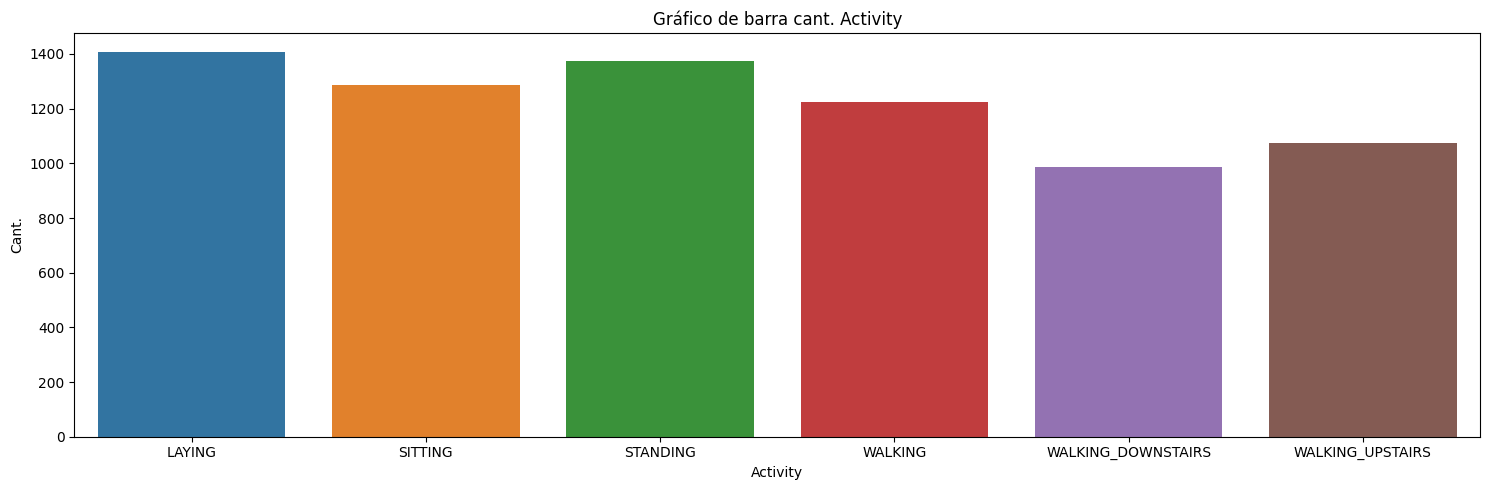

In [26]:
from utils.eda_utils import graficar_barras_conteo


graficar_barras_conteo(df, ["Activity"], nro_columnas=1, figsize=(15, 5))

/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_1_human_activity_recognition/notebooks/utils/eda_utils.py:427: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby(columna)["counts"].count().reset_index()


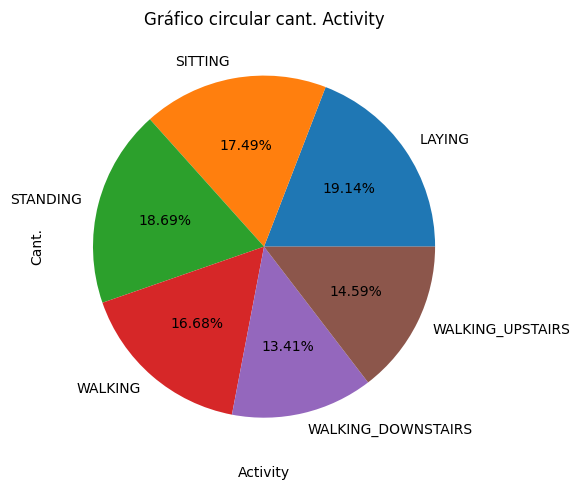

In [27]:
from utils.eda_utils import graficar_tortas_conteo


graficar_tortas_conteo(df, ["Activity"], nro_columnas=1, figsize=(15, 5))

De los gráficos de barra y circular podemos destacar:

* No existe un desbalanceo muy alto en el dataset para cada tipo de actividad
* Las actividades que tienen un menor porcentaje en comparación a las otras actividades son:
    * WALKING_DOWNSTAIRS
    * WALKING_UPSTAIRS
* Esta leve diferencia se puede interpretar como que una persona por lo general pasa menos tiempo subiendo o bajando las escaleras, en comparación a otros tipos de actividades.
* Al no encontrarse un desbalanceo muy grande, es menos probable que en el modelo se produzcan sesgos por mayor o menor cantidad de muestras para cada actividad (clase a ser predicha).

##### Visualizaciones como histogramas o boxplots.

Debido a la gran cantidad de columnas presentes en el dataset, se opta en vez por realizar las visualizaciones y sacar conclusiones despues de la aplicación de la técnica de agrupamiento a utilizar.

## 2. Análisis no supervisado:

### Selecciona un enfoque de análisis no supervisado: K-means o PCA.

Teniendo en cuenta que los datos provienen de sensores de teléfono, es muy probable que estos datos tengan una alta correlación entre sí, sea lineal o no. Por lo cual, el método elegido para este problema es el PCA.

In [28]:
columnas_prediccion = df.columns.tolist()
columnas_prediccion.remove("subject")
columnas_prediccion.remove("Activity")

X = df[columnas_prediccion]
y = df["Activity"]

Importamos las librerías necesarias.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, History
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Métricas
# Evaluación
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    RocCurveDisplay,
)

from utils.classification_utils import graficar_matriz_confusion

# Seteamos la semilla en 1 para alcanzar reproducibilidad para el modelo.
tf.keras.utils.set_random_seed(1)

2024-12-15 05:39:05.181534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734241145.197760  224248 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734241145.202642  224248 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Dividmos el dataset en train y test. Esto lo hacemos ya que la idea es utilizar el resultado del PCA como entrada para el entrenamiento del modelo MLP más adelante.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Preparamos la visualización del PCA con 500 componentes, utilizando diferentes técnicas de escalamiento.

Se realizarán las pruebas con las siguientes técnicas de escalamiento:
* Ninguna. Se analiza esta opción ya que según análsis previos, existe la posibilidad de que todas las columnas estén en el rango (-1, 1), con la excepción de columnas que sí tienen un rango menor, pero que de igual manera están contenidos en este rango y que podría darse nada más porque no se recolectó ninguna muestra que denote los mínimos y máximos reales.
* MinMaxScaler. Se analiza esta opción de normalización ya que la mayoría de las columnas tienen este rango y es lo que tiene mas sentido implementar para mantener las escalas en los mismos rangos
* StandardScaler. Solamente se agrega para visualizar el rendimiento de la estandarización como técnica de escalamiento en comparación con otras técnicas.
* RobustScaler. Se agrega esta opción para determinar si es que usar esta técnica de escalamiento da alguna ventaja, ya que se visualizó en análisis previos una gran cantidad de outliers.

Se elige una varianza explicativa objetivo del 90% como límite para retener la mayor cantidad de información posible de los datos. El análisis de PCA se realizará exclusivamente sobre los datos de train, para determinar cuál es el mejor número de componentes solo con los datos de entrenamiento, evitando así introducir segsos desde los datos de prueba.

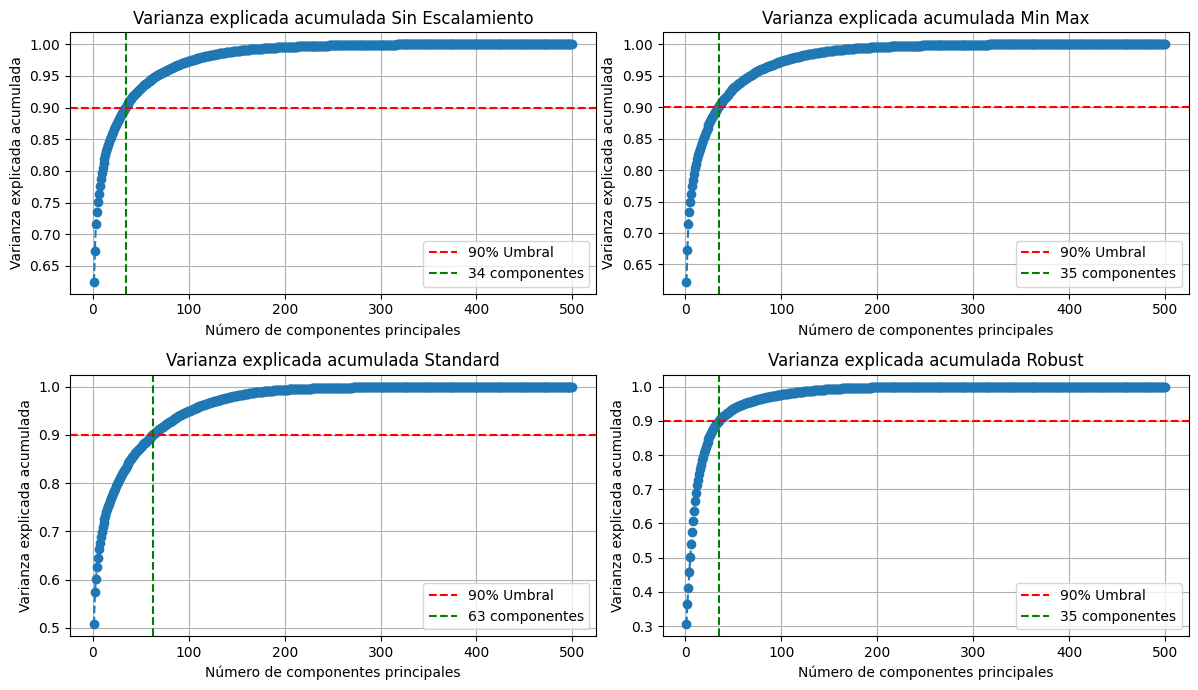

In [31]:
n_components = 500
tecnicas_escalamiento = [
    # Se agrega None a la lista para denotar que no se utilizará escalamiento. Se analiza esta opción ya que 
    # según los análisis previos, existe la posibilidad que los datos ya estén en el rango de (-1, 1) con
    # la excepción de columnas que sí tienen un rango menor, pero que se puede deber nada más a que
    # 
    ("Sin Escalamiento", None),
    ("Min Max", MinMaxScaler(feature_range=(-1, 1))),
    ("Standard", StandardScaler()),
    ("Robust", RobustScaler()),
]

modelos_pca = []
componentes_optimos_pca = {}


for nombre_tecnica, tecnica_escalamiento in tecnicas_escalamiento:
    X_data = X_train.copy()
    if tecnica_escalamiento is not None:
        X_data = tecnica_escalamiento.fit_transform(X_data)

    pca_modelo = PCA(n_components=n_components)
    pca_modelo.fit(X_data)

    modelos_pca.append((nombre_tecnica, pca_modelo))

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

i_actual = 0
j_actual = 0


for nombre_tecnica, modelo_pca in modelos_pca:
    # Variación explicada acumulada
    varianza_explicada_acumulativa = np.cumsum(modelo_pca.explained_variance_ratio_)

    ax = axes[i_actual][j_actual]

    # Graficar
    ax.plot(range(1, n_components + 1), varianza_explicada_acumulativa, marker='o', linestyle='--')
    ax.set_title(f'Varianza explicada acumulada {nombre_tecnica}')
    ax.set_xlabel('Número de componentes principales')
    ax.set_ylabel('Varianza explicada acumulada')
    ax.grid(True)

    # Marcar el umbral del 90% como referencia
    threshold = 0.9
    componentes_optimos = np.argmax(varianza_explicada_acumulativa >= threshold) + 1
    ax.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
    ax.axvline(x=componentes_optimos, color='g', linestyle='--', label=f'{componentes_optimos} componentes')

    ax.legend()

    componentes_optimos_pca[nombre_tecnica] = componentes_optimos

    if j_actual + 1 >= 2:
        i_actual += 1
        j_actual = 0
    else:
        j_actual += 1

plt.tight_layout()
plt.show()

De los gráficos de varianza explicada acumulada podemos destacar lo siguiente:

* En el caso de no utilizar escalamiento, se puede retener el 90% de la varianza explicada utilizando 34 componentes.
* Usando la normalización como técnica de escalamiento (MinMaxScaler), se logra retener el 90% de la variaza usando 35 componentes.
* Usando la estandarización como técnica de escalamiento (StandardScaler), se logra retener el 90% de la varianza usando 63 compoenntes.
* Finalmente, usando la técnica de escalamiento RobustScaler, se logra retener el 90% de la varianza explicada usando 35 componentes.

En este dataset, parece ser que la opción que logra un menor número de características principales es no aplicar ningún tipo de escalamiento. Esto se puede deber a que posiblemente los datos ya están normalizados y con un rango (-1, 1), y que existan rangos un poco menores pero contenidos dentro de estos límites se puede deber nada más a que los sensores no midieron nada más valores mayores o menores a los encontrados.

Graficamos la varianza explicada por componente para cada técnica de escalamiento.

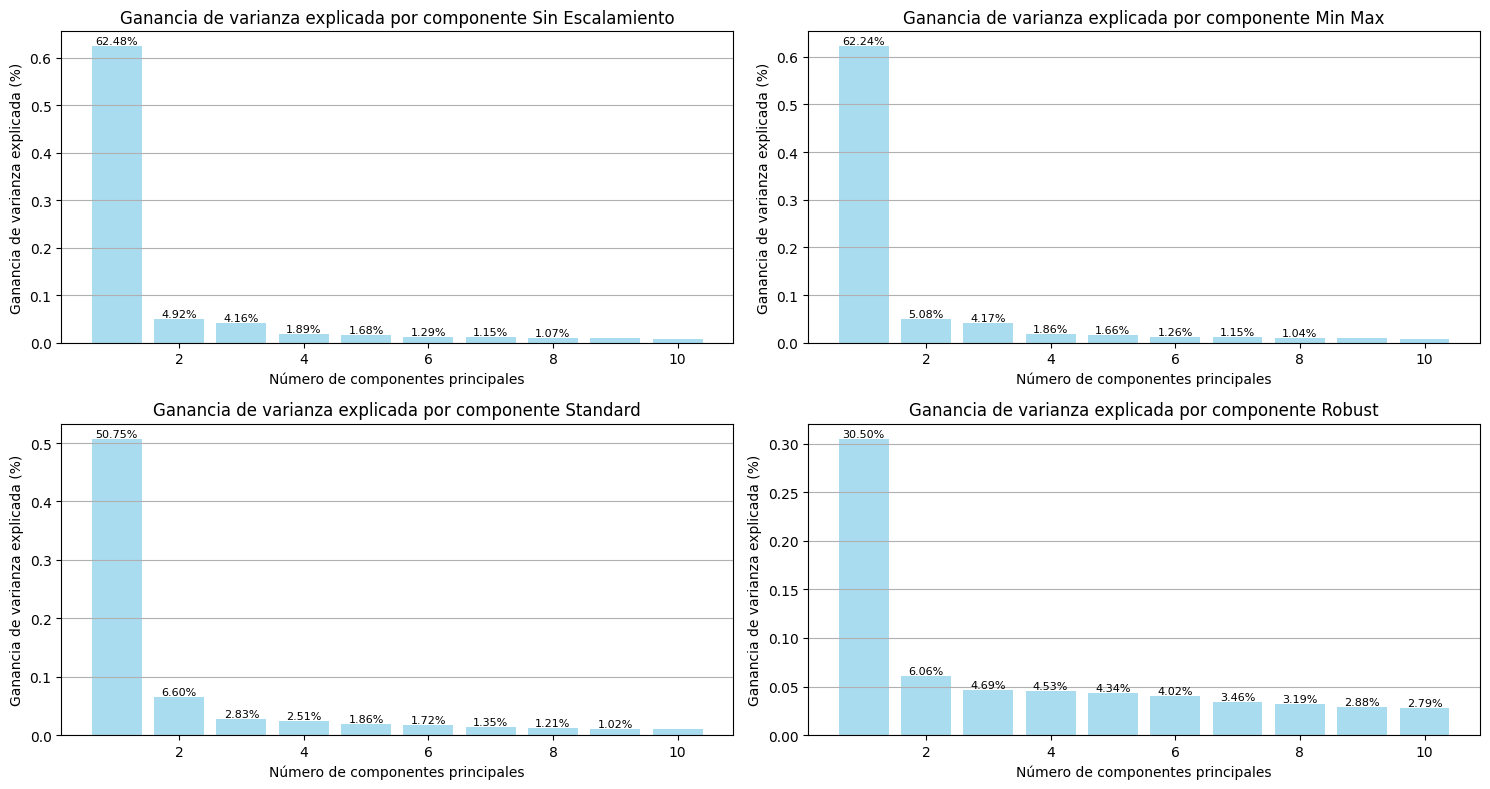

In [32]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

i_actual = 0
j_actual = 0


for nombre_tecnica, modelo_pca in modelos_pca:
    varianza_explicada_acumulativa = np.cumsum(modelo_pca.explained_variance_ratio_)
    ganancia_varianza_explicada = np.diff(varianza_explicada_acumulativa, prepend=0)

    # Seleccionamos solo los 10 componentes que tengan una mayor contribución
    ganancia_varianza_explicada = ganancia_varianza_explicada[:10]

    ax = axes[i_actual][j_actual]

    ax.bar(range(1, 11), ganancia_varianza_explicada, color='skyblue', alpha=0.7)
    ax.set_title(f'Ganancia de varianza explicada por componente {nombre_tecnica}')
    ax.set_xlabel('Número de componentes principales')
    ax.set_ylabel('Ganancia de varianza explicada (%)')
    ax.grid(axis='y')

    # Resaltar las primeras componentes principales más significativas
    threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
    significant_components = [i for i, gain in enumerate(ganancia_varianza_explicada, 1) if gain > threshold_gain]
    for component in significant_components:
        ax.text(component, ganancia_varianza_explicada[component - 1], f"{ganancia_varianza_explicada[component - 1]:.2%}", 
                ha='center', va='bottom', fontsize=8, color='black')

    if j_actual + 1 >= 2:
        i_actual += 1
        j_actual = 0
    else:
        j_actual += 1



plt.tight_layout()
plt.show()


De estos gráficos de varianza explicada por componente podemos destacar:

* Para la varianza explicada por componente sin escalamiento:
    * El primer componente es el que más varianza explicada posee, con un 62.48% de varianza explicada acumulada
    * El segundo y tercer componente ya empiezan a proveer menos varianza, solamente alcanzando 4.92% y 4.16% respectivamente
    * Los demas componentes ya empiezan a proveer cada vez menos varianza
* Para la varianza explicada por componente con normalización (MinMaxScaler):
    * Se ven resultados muy similares a los resultados anteriores
    * El primer componente logra capturar 62.24% de la varianza.
    * El segundo y tercer componente acumulan 5.08% y 4.17% de la varianza respectivamente
    * Los demas componentes proveen ya menor varianza
* Para la varianza explicada por componente con estandarización (StamdardScaler):
    * Se verifican resultados un poco diferentes a las técnicas anteriores
    * El primer componente sigue manteniendo la mayor cantidad de varianza explicada, aunque el porcentaje disminuyó al 50.72%
    * El segundo componente logra mantener el 6.60% de la varianza explicada
    * En los siguientes componentes ya se empieza a notar una disminución en varianza explicada acumulada.
* Para la varianza explicada por componente con RobustScaler:
    * Se sigue reteniendo la mayor cantidad de la varianza en el primer componente, no obstante el porcentaje es drásticamente menor que en las técnicas anteriores, siendo sólo del 30.5%.
    * El segundo componente logra mantener una varianza explicada del 6.06%
    * Los componentes siguientes logran retener más cantidad de varianza comparado a las otras técnicas de escalamiento, aunque de igual manera los porcentajes son bajos en comparación al componente 1.
* De los 4 gráficos podemos destacar, que existe un componente bastante predominante y otros componentes que retienen menor varianza explicada. Esto nos indica que los valores medidos por los sensores están en gran parte relacionados, y la técnica de PCA está extrayendo estas relaciones en componentes independientes, lo que resulta en un solo componente acaparando la mayor cantidad de varianza. Esto se podría explicar teniendo en cuenta que los sensores miden variables que están de una u otra manera relacionados. Por ejemplo: la aceleración, velocidad, posición, rotación.

Visualizamos ahora los datos proyectados en el espacio de los componentes principales.

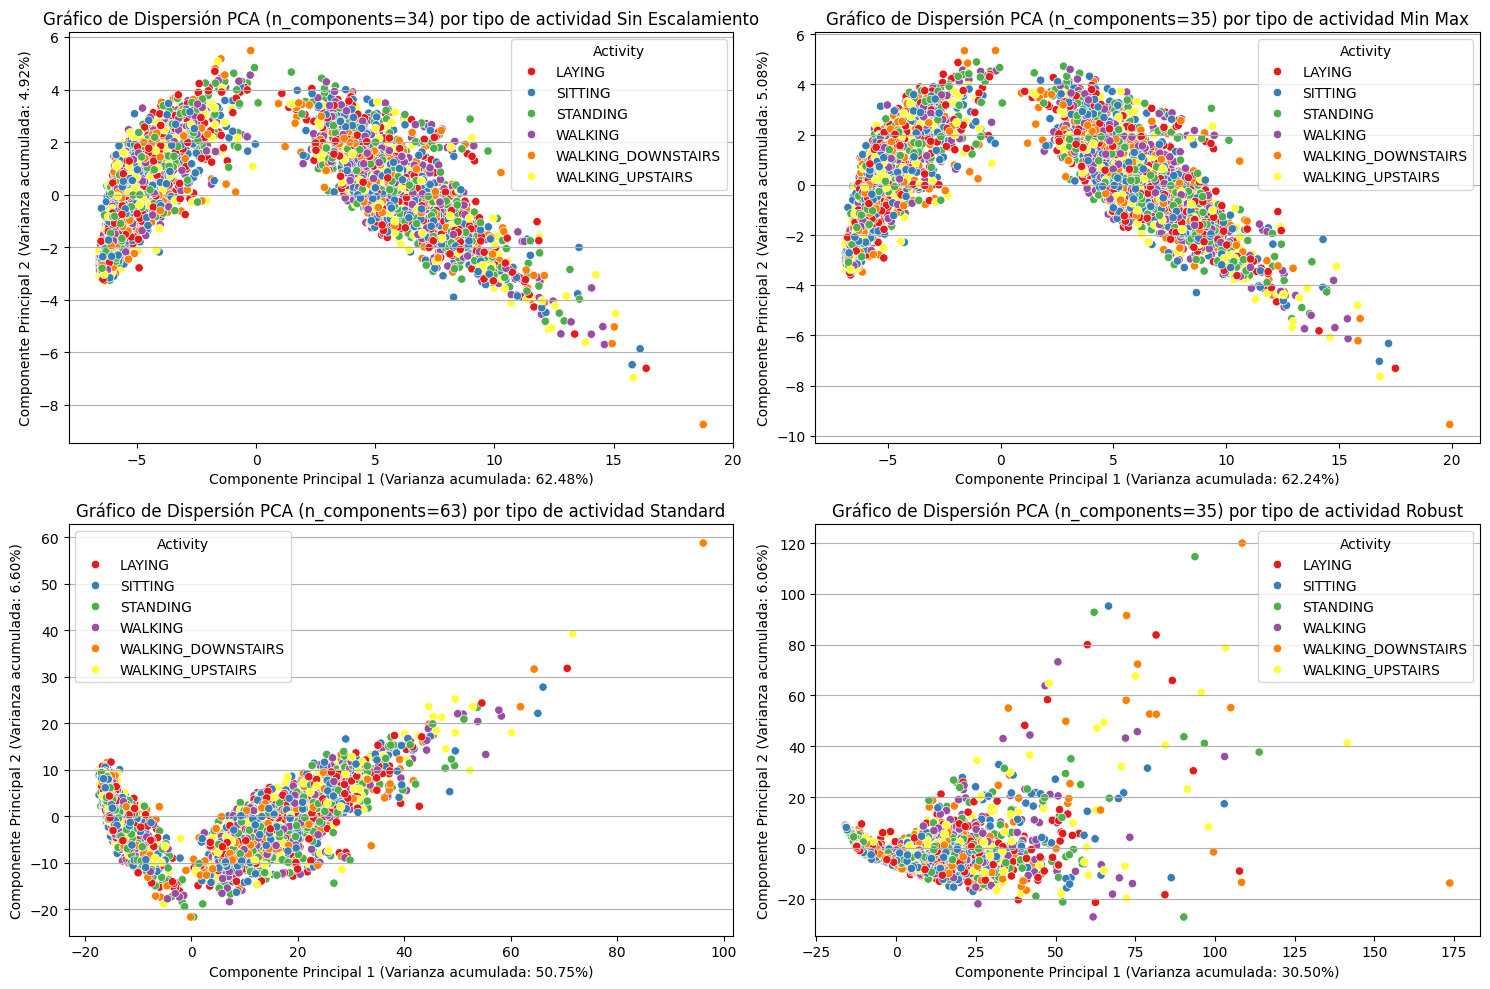

In [33]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

i_actual = 0
j_actual = 0


for nombre_tecnica, tecnica_escalamiento in tecnicas_escalamiento:
    X_data = X_train.copy()
    if tecnica_escalamiento is not None:
        X_data = tecnica_escalamiento.fit_transform(X_data)

    n_components = componentes_optimos_pca[nombre_tecnica]

    modelo_pca = PCA(n_components=n_components)
    X_pca = modelo_pca.fit_transform(X_data)

    df_pca = pd.DataFrame([])
    df_pca["pca_0"] = X_pca[:, 0]
    df_pca["pca_1"] = X_pca[:, 1]
    df_pca["Activity"] = df["Activity"]

    ax = axes[i_actual][j_actual]

    sns.scatterplot(data=df_pca, x="pca_0", y="pca_1", hue="Activity", palette="Set1", ax=ax)

    varianza_explicada_acumulativa = np.cumsum(modelo_pca.explained_variance_ratio_)
    ganancia_varianza_explicada = np.diff(varianza_explicada_acumulativa, prepend=0)

    # Seleccionamos solo los 2 primeros componentes
    ganancia_varianza_explicada = ganancia_varianza_explicada[:2]

    ax.set_title(f'Gráfico de Dispersión PCA (n_components={n_components}) por tipo de actividad {nombre_tecnica}')
    ax.set_xlabel(f'Componente Principal 1 (Varianza acumulada: {ganancia_varianza_explicada[0] * 100:.2f}%)')
    ax.set_ylabel(f'Componente Principal 2 (Varianza acumulada: {ganancia_varianza_explicada[1] * 100:.2f}%)')
    ax.grid(axis='y')

    if j_actual + 1 >= 2:
        i_actual += 1
        j_actual = 0
    else:
        j_actual += 1



plt.tight_layout()
plt.show()

De los gráficos podemos destacar:

* En el caso del gráfico de dispersión sin escalamiento y en el de dispersión con normalización, podemos notar dos agrupamientos de los componentes:
    * El primer grupo muestra una correlación ascendente. Es decir, a medida que incrementa el componenet principal 1, también incrementa el componente principal 2.
    * El segundo grupo muestra una correlación descendente. Es decir, a medida que aumenta el componente principal 1, el segundo disminuye.
    * Estas relaciones podrían también ser detectadas por un modelo predictivo, así que es bueno que existan. No obstante, será necesario introducir al modelo de prediccion no linealidad para que pueda detectar este cambio en la dirección de las correlaciones.
* En el Gráfico de Disperción con estandarización, podemos notar dos agrupamientos:
    * El primer grupo muestra una correlación descendente. Es decir, a medida que aumenta el componente principal 1, el segundo disminuye.
    * El segundo grupo muestra una correlación ascendente. Es decir, a medida que incrementa el componente principal 1, el segundo aumenta también.
    * De manera similar al caso anterior, las relaciones podrían tener un efecto positivo en el modelo de predicción, pero hay que agregar activaciones no lineales al modelo MLP a entrenar.
* En el último gráfico, podemos notar que inicialmente se ve una correlación, no obstante, a medida que incrementa el componente principal 1, incrementa la dispersión, lo cual indica una corelación fuerte al principio pero que va volviéndose más debil.

Visualizamos ahora las contribuciones de cada columna a los componentes principales.

In [34]:
for nombre_tecnica, modelo_pca in modelos_pca:
    loadings = pd.DataFrame(
        modelo_pca.components_.T,  # Transponer para tener variables como filas
        columns=[f'PC{i+1}' for i in range(modelo_pca.n_components_)],
        index=columnas_prediccion
    )

    # Mostrar resultados
    print(f"Modelo con escalamiento {nombre_tecnica}")

    print("\n")

    # Analizar las variables más influyentes
    for i in range(2):
        most_influential = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)[:5]
        print(f"Las 5 variables más influyentes en PC{i+1} son:")
        print(most_influential)

        print("\n")

    print("\n")

Modelo con escalamiento Sin Escalamiento


Las 5 variables más influyentes en PC1 son:
fBodyAccJerk-entropy()-X     0.125625
fBodyAccJerk-entropy()-Y     0.122739
tBodyAccJerkMag-entropy()    0.120898
fBodyAcc-entropy()-X         0.120512
fBodyAccMag-entropy()        0.113545
Name: PC1, dtype: float64


Las 5 variables más influyentes en PC2 son:
fBodyAcc-skewness()-Z      0.160262
tBodyGyroMag-entropy()     0.158067
fBodyAcc-kurtosis()-Z      0.150587
tBodyGyroMag-arCoeff()1    0.137059
fBodyAcc-meanFreq()-Z      0.129562
Name: PC2, dtype: float64




Modelo con escalamiento Min Max


Las 5 variables más influyentes en PC1 son:
fBodyAccJerk-entropy()-X     0.121140
fBodyAccJerk-entropy()-Y     0.118132
tBodyAccJerkMag-entropy()    0.116839
fBodyAcc-entropy()-X         0.116657
fBodyAcc-entropy()-Y         0.111847
Name: PC1, dtype: float64


Las 5 variables más influyentes en PC2 son:
fBodyAcc-skewness()-Z        0.151192
tBodyGyroMag-entropy()       0.147892
tGravityAcc-arCoeff()-Z,1

Analizamos los resultados podemos destacar:

* En el caso del PCA sin escalamiento:
    * Para el componente principal 1, los datos más influyentes son: fBodyAccJerk, fBodyAcc, fBodyAccMag. Estos parámetros son indicadores de movimiento, por lo que el movimiento se está capturando en este componente.
    * Para el componente principal 2, los datos más influyentes son fBodyAcc, fBodyGyroMag. En este caso, en este componente se está capturando tanto partes de la aceleración como la orientación del cuerpo.
* En el caso del PCA con normalización:
    * Para el componente principal 1, los datos más influyentes son: fBodyAccJerk, fBodyAcc, fBodyAccMag. Estos parámetros son indicadores de movimiento, por lo que el movimiento se está capturando en este componente.
    * Para el componente principal 2, vuelven a aparecer partes de fBodyAcc y fBodyGyroMag, con la adición de fGravityAcc. Esto indica que en este componente influye también bastante la gravedad, a diferencia del PCA sin escalamiento.
* En el caso del PCA con estandarización:
    * Para el componente principal 1, los datos más influyentes son: fBodyAcc, fBodyAccJerk, fBodyGyro. Esto nos indica que en este componente se están capturando partes de tanto la aceleración como la orientación.
    * Para el componente principal 2, vuelven a aparecer partes de fBodyAcc y fBodyGyroMag, con la adición de fGravityAcc. También podemos visualizar efectos de la gravedad en este componente.
* En el caso del PCA con escalamiento Robust:
    * En la componente principal 1, los datos más influyentes son: fBodyAccJerk, fBodyGyro. Por tanto, en este componente también se están capturando datos de aceleración y orientación.
    * En la componente principal 2, se puede visualizar de vuelta fBodyAccJerk, fBodyGyro, y tGravityAcc. También notamos una leve influencia de la gravedad en este componente.

## 3. Modelado con MLP:

Para este modelo, se opta por usar PCA como pre requisito para el entrenamiento, sin usar normalización para el PCA, ya que se determinó que los datos ya están normalizados en el dataset original y no es necesario aplicar otro escalamiento. Adicionalmente, el PCA que logra mantener una varianza explicada del 90% con el menor número de componentes es el sin normalización extra.

### Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.

Esto ya fue realizado para el paso de análisis con PCA.

### Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.

Preparamos el PCA

In [35]:
print(componentes_optimos_pca)

{'Sin Escalamiento': np.int64(34), 'Min Max': np.int64(35), 'Standard': np.int64(63), 'Robust': np.int64(35)}


Verificamos la cantidad de clases que se deben predecir:

In [36]:
df["Activity"].unique().tolist()

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

Creamos el Modelo Perceptrón Multicapa (MLP) con las siguientes consideraciones:

* Se necesitarán 34 entradas, que provendrán de la conversión del PCA.
* Se necesitarán 6 salidas, que corresponden a cada clase a ser predicha.
* Se agregarán dos capas a la red neuronal, una de 64 entradas y otra de 32, las dos con activación de tipo relu para introducir no linealidad al modelo de acuerdo a lo visto en las gráficas de dispersión del PCA.
* Se agregará un dropout a la salida de cada capa con el objetivo de evitar overfitting.
* Se usará categorical_crossentropy como función de pérdida para el modelo. Esta función de pérdida es usada específicamente para modelos de clasificación multi clase.
* Se usará accuracy como métrica principal, con el objetivo de predecir correctamente la mayor cantidad de clases.
* Se usara Adam como optimizador para la búsqueda de los mínimos.
* Se seleccionará learning_rate como 0.001 para. Este valor debe ser bajo para alcanzar un buen mínimo con el optimizador.
* Se seleccionará un batch_size de 16, pequeño, ya que el learning_rate seleccionado es bajo para este modelo.
* Se utilizará la técnica de early stopping para detectar cuando la pérdida de validación ya no baja, disminuyendo la posibilidad de overfitting.

In [37]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=n_components),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


model = create_model()
model.summary()

/home/diego/.virtualenvs/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734241157.286459  224248 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2449 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,142 (59.15 KB)

 Trainable params: 15,142 (59.15 KB)

 Non-trainable params: 0 (0.00 B)

A continuación, se implementa una integración entre Keras y Sklearn para facilitar el uso de pipelines. La implementación se basó en este [ejemplo](https://www.geeksforgeeks.org/can-we-use-scikit-learn-and-tensorflow-together/).

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLPTfClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=1, batch_size=32, verbose=0, validation_split=None, callbacks=None):
        # Copiamos como atributos los parámetros que usaríamos para entrenar
        # el modelo con tensorflow normalmente.
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = model
        self.validation_split = validation_split
        self.callbacks = callbacks
        # Marcamos model como None para tener compatibilidad con IPython.
        self.model = None

    def fit(self, X, y):
        # Convertimos los datos categóricos a onehot para poder realizar las predicciones.
        y_onehot = to_categorical(y)
        self.model_.fit(
            X,
            y_onehot,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=self.verbose,
            validation_split=self.validation_split,
            callbacks=self.callbacks,
        )
        return self

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.predict(X)

    def predict(self, X):
        predictions = []

        predictions_tf = self.model_.predict(X)
        for row in predictions_tf:
            # Retornamos la clase que mejor probabilidad tuvo entre todas.
            # Esto se realiza para tener los resultados en el mismo formato
            # de entrada al momento de realizar el entrenamiento.
            predictions.append(row.argmax())

        return np.array(predictions)

    def predict_proba(self, X):
        return self.model_.predict(X)

    def score(self, X, y):
        _, accuracy = self.model_.evaluate(X, y, verbose=self.verbose)
        return accuracy

Adicionalmente, para el modelo definido, implementaremos la técnica de early_stopping para evitar que la red neuronal se sobre entrene.

In [39]:
# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = History()

# Create a Scikit-learn pipeline
mlp = Pipeline([
    # Implementamos el PCA de acuerdo a las decisiones tomadas.
    ('pca', PCA(n_components=n_components)),
    ('model', MLPTfClassifier(
        model=model,
        epochs=50,
        batch_size=16,
        verbose=1,
        validation_split=0.2,
        callbacks=[history, early_stopping]
    ))
])

Para poder predecir todas las clases en el dataset, es necesario codificar la salida. Esto se realiza a través de un LabelEncoder, que luego es manejado por el modelo MLP internamente codificándolas con el método onehot como necesita el modelo (una predicción por clase), y reconvirtiendo las salidas a numéricas, de acuerdo a la probabilidad de cada clase.

In [40]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)

mlp.fit(X_train, y_train_encoded)

Epoch 1/50


I0000 00:00:1734241160.781244  224465 service.cc:148] XLA service 0x76b04c00aab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734241160.781280  224465 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-15 05:39:20.818417: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734241160.992972  224465 cuda_dnn.cc:529] Loaded cuDNN version 90300


 46/258 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3355 - loss: 1.6203

I0000 00:00:1734241162.979449  224465 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5644 - loss: 1.0640 - val_accuracy: 0.9117 - val_loss: 0.2255
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.3160 - val_accuracy: 0.9350 - val_loss: 0.1690
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.2268 - val_accuracy: 0.9417 - val_loss: 0.1418
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9250 - loss: 0.1975 - val_accuracy: 0.9388 - val_loss: 0.1403
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9317 - loss: 0.1608 - val_accuracy: 0.9485 - val_loss: 0.1331
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9428 - loss: 0.1474 - val_accuracy: 0.9544 - val_loss: 0.1160
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.1256 - val_accuracy: 0.9583 - val_loss: 0.1073
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9570 - loss: 0.1129 - val_accuracy: 0.9602 - val

Pipeline(steps=[('pca', PCA(n_components=np.int64(35))),
                ('model',
                 MLPTfClassifier(batch_size=16,
                                 callbacks=[<keras.src.callbacks.history.History object at 0x76b102a51ed0>,
                                            <keras.src.callbacks.early_stopping.EarlyStopping object at 0x76b0fd91aa70>],
                                 epochs=50, model=None, validation_split=0.2,
                                 verbose=1))])

## 4. Evaluación del modelo:

### Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.

In [41]:
y_pred_mlp = mlp.predict(X_test)
y_pred_proba_mlp = mlp.predict_proba(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
y_pred_mlp

array([4, 4, 3, ..., 4, 0, 4])

In [43]:
y_pred_proba_mlp

array([[5.84770032e-15, 9.55420046e-15, 2.29456016e-12, 1.05357285e-11,
        1.00000000e+00, 3.54713148e-09],
       [2.53720510e-18, 5.64135317e-18, 8.05121503e-15, 4.47074628e-14,
        1.00000000e+00, 1.92095177e-11],
       [1.07344517e-15, 4.20549807e-17, 8.31590726e-18, 1.00000000e+00,
        5.07446932e-11, 1.90425106e-11],
       ...,
       [7.12994688e-19, 9.04440523e-19, 1.02665179e-14, 9.13890139e-14,
        1.00000000e+00, 2.76556208e-12],
       [1.00000000e+00, 2.46463578e-08, 1.11763372e-15, 1.04164487e-13,
        1.94652576e-15, 3.56279473e-09],
       [1.41060648e-17, 1.41989241e-17, 2.10381029e-14, 7.79278511e-14,
        1.00000000e+00, 2.50887453e-11]], dtype=float32)

In [44]:
y_test_encoded = encoder.transform(y_test)

In [45]:
y_test_encoded

array([4, 4, 3, ..., 4, 0, 4])

In [46]:
accuracy = accuracy_score(y_test_encoded, y_pred_mlp)
precision = precision_score(y_test_encoded, y_pred_mlp, average="weighted")
recall = recall_score(y_test_encoded, y_pred_mlp, average="weighted")
f1 = f1_score(y_test_encoded, y_pred_mlp, average="weighted")
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba_mlp, multi_class="ovr")

In [47]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1: 0.96
ROC AUC: 1.00


In [48]:
reporte = classification_report(y_test_encoded, y_pred_mlp, target_names=encoder.classes_)
print(reporte)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       428
           SITTING       0.90      0.91      0.91       386
          STANDING       0.91      0.91      0.91       411
           WALKING       0.98      0.99      0.99       366
WALKING_DOWNSTAIRS       0.99      0.97      0.98       311
  WALKING_UPSTAIRS       0.98      0.98      0.98       304

          accuracy                           0.96      2206
         macro avg       0.96      0.96      0.96      2206
      weighted avg       0.96      0.96      0.96      2206



In [49]:
matriz_confusion = confusion_matrix(y_test_encoded, y_pred_mlp)
print(matriz_confusion)

[[428   0   0   0   0   0]
 [  0 351  35   0   0   0]
 [  0  37 374   0   0   0]
 [  0   0   0 363   1   2]
 [  0   0   0   5 303   3]
 [  0   0   0   3   3 298]]


In [50]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

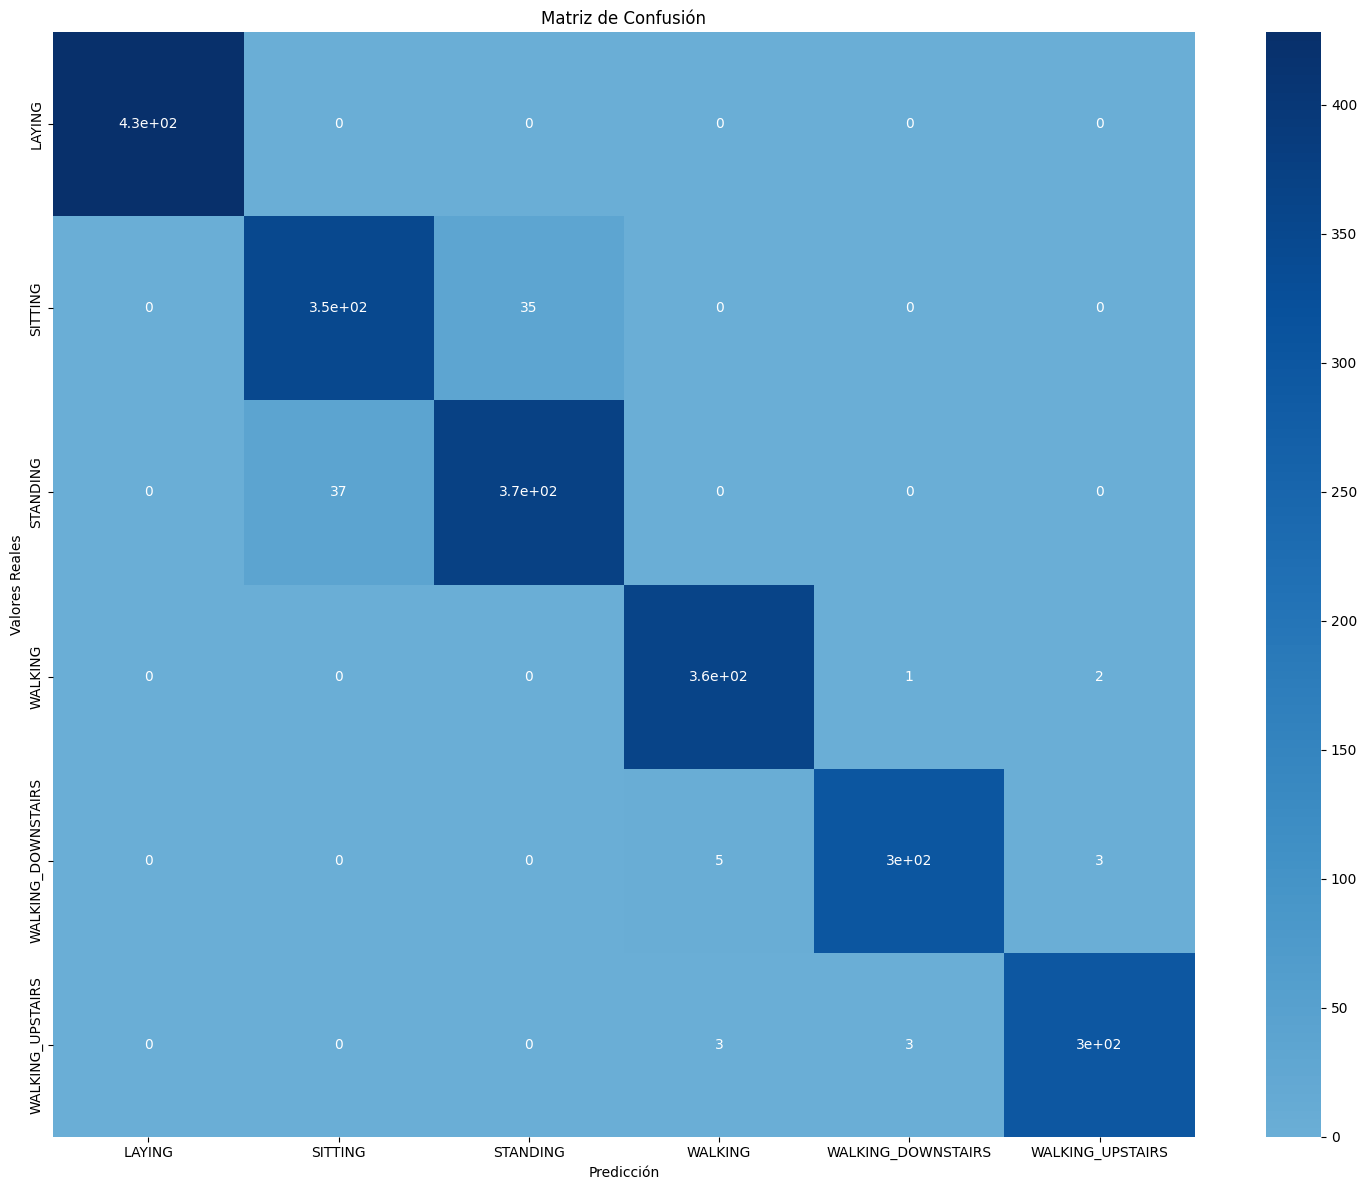

In [51]:
graficar_matriz_confusion(matriz_confusion, labels=encoder.classes_, figsize=(15, 12))

Graficamos las curvas ROC-AUC para cada clase.

In [52]:
fpr = dict()
tpr = dict()
roc_auc = dict()

binarizer = LabelBinarizer()

y_pred_mlp_binarized = binarizer.fit_transform(y_pred_mlp)
y_test_binarized = binarizer.transform(y_test_encoded)

classes = encoder.classes_
n_classes = len(classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_mlp_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_mlp_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.98
Macro-averaged One-vs-Rest ROC AUC score:
0.98


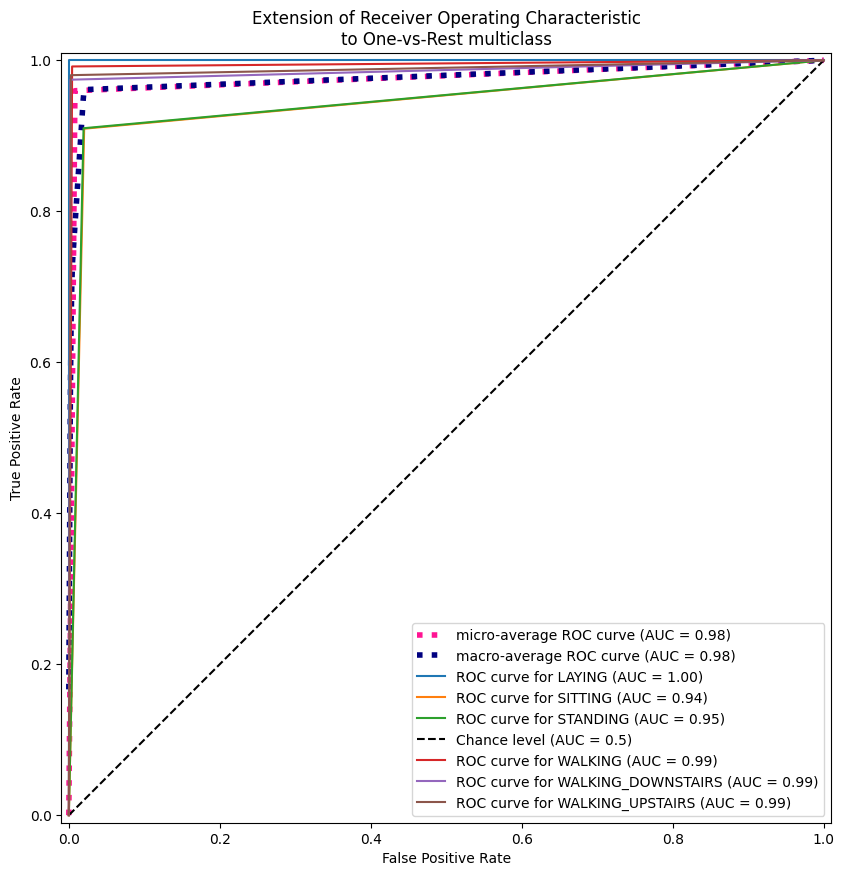

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(0, n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, class_id],
        y_pred_mlp_binarized[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

Según los resultados obtenidos de las métricas, reporte de clasificación, matriz de confusión, y curvas ROC AUC, podemos concluír:

* Las métricas como accuracy, precision, recall, f1 score poseen todas un valor promedio de 0.96. Un valor bastante alto, indicando que el modelo MLP es un buen modelo para predecir las actividades de las personas en base a los sensores.
* La métrica ROC AUC reporta un valor approx de 1.00, lo que indica que el modelo tiene una muy buena tasa de aciertos.
* Del reporte de clasificación, podemos notar que la mayoría de las clases tienen un buen performance en métricas como precision, recall, f1-score, con la excepción de las clases SITTING y STANDING, que tienen métricas como precision, recall, f1-score un poco mas bajos que las demás clases.
* La matriz de confusión del modelo nos indica, al igual que la conclusión anterior, que el modelo está teniendo un performance levemente menor para las clases SITTING y STANDING, teniendo 37 fallos para la clase SITTING que fueron predichos como STANDING, y 35 fallos para la clase STANDING que fueron predichas como SITTING.
* Las curvas ROC AUC one vs rest también nos indican que el modelo tiene un peor performance en estas clases, con el AUC de 0.95 para standing y 0.94 para sitting. Para las otras, las areas AUC oscilan entre 0.98 y 1.00
* Esto nos indica, que este modelo no tiene problema en detectar actividades de movimiento y LAYING, no obstante se encuentran más fallos para las classes en la que la persona no se está moviendo.
* No se necesitó realizar un reajuste de hiperparámetros, ya que los seleccionados son apropiados para este modelo.

### Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

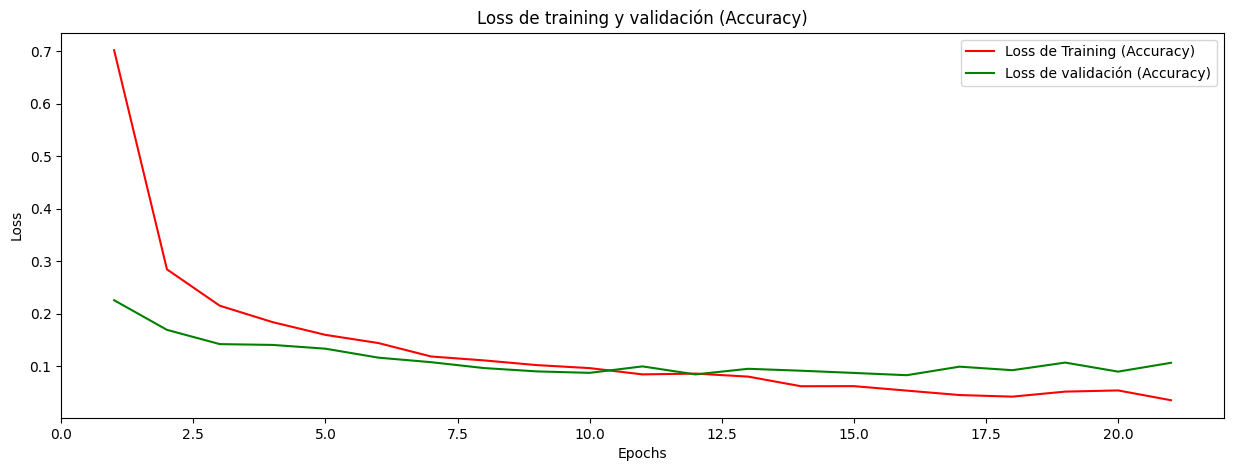

In [54]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(tr_loss))]

# Gráfico
plt.figure(figsize= (15, 5))

plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training (Accuracy)')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación (Accuracy)')
plt.title('Loss de training y validación (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

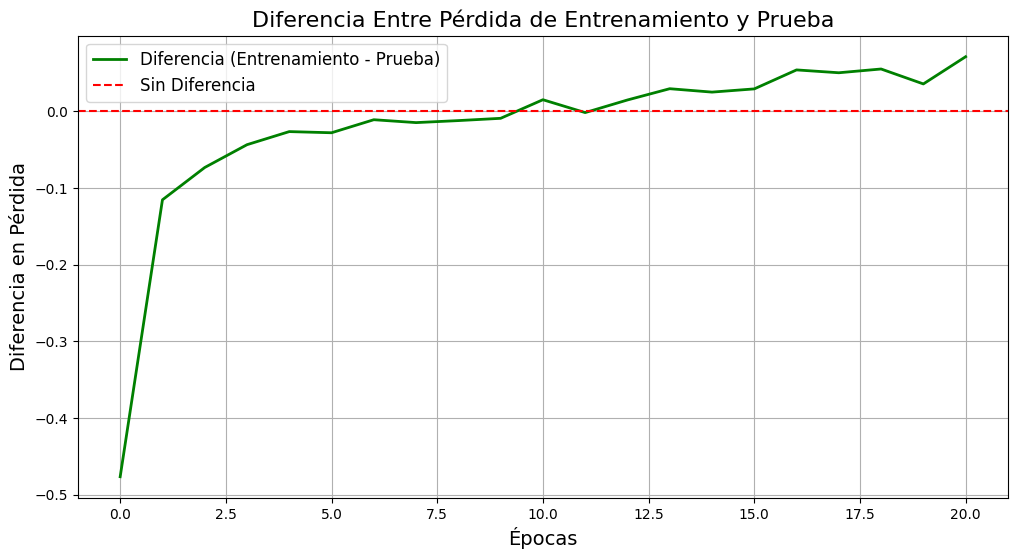

In [55]:
# Diferencia entre las pérdidas
loss_difference = np.array(history.history['val_loss']) - np.array(history.history['loss'])

plt.figure(figsize=(12, 6))
plt.plot(loss_difference, label="Diferencia (Entrenamiento - Prueba)", color="green", linewidth=2)
plt.axhline(0, color="red", linestyle="--", label="Sin Diferencia")
plt.title("Diferencia Entre Pérdida de Entrenamiento y Prueba", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Diferencia en Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

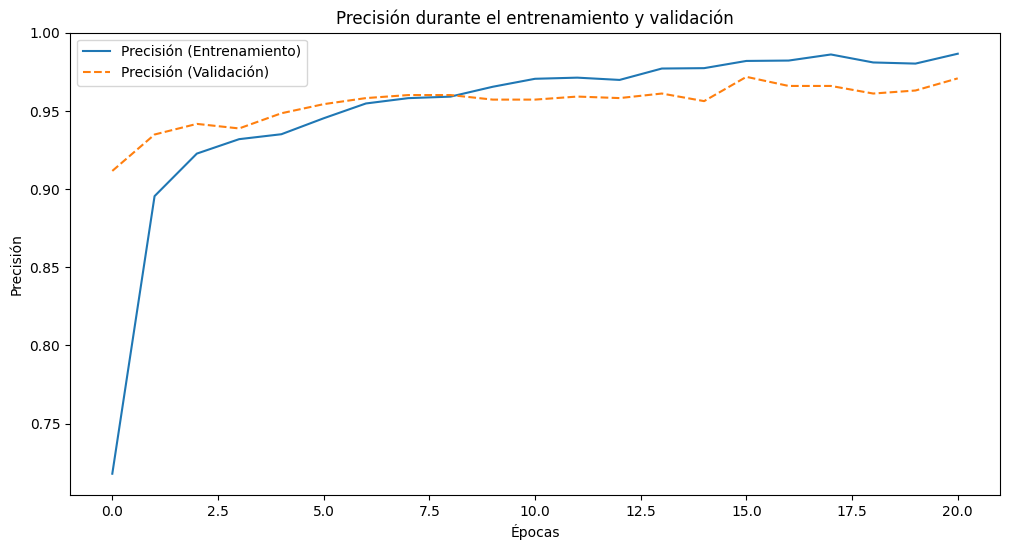

In [56]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label=f"Precisión (Entrenamiento)")
plt.plot(history.history['val_accuracy'], linestyle='--', label=f"Precisión (Validación)")

plt.title("Precisión durante el entrenamiento y validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

En el caso del recall, no es posible realizar el calculo, ya que la función precision_recall_curve no soporta problemas multiclase.

De estos gráficos de training y validación podemos destacar:

* Inicialmente se puede visualizar una pérdida bastante alta en el accuracy, pero que va reduciéndose a medida que pasan más épocas de entrenamiento
* En el caso de la pérdida de validación, se visualiza que dicha perdida se mantiene estable alrededor de los 0.1-0.2
* Notamos también que hay una menor pérdida en la validación en las primeras épocas. Esto se nota tanto en los gráficos de pérdidas como en la diferencia. Esto se puede deber a que las capas de dropout causan que ciertas neuronas estén apagadas durante el entrenamiento, lo que puede llevar a que la pérdida de entrenamiento sea menor a la de validación inicialmente.
* La época en la que la la pérdida de validación empieza a crecer es en la 10.
* No se puede visualizar un incremento repentino en la pérdida de validación, por lo que el modelo está detectando los patrones correctos. Esto también nos indica que el modelo no está presentando overfitting.

## 5. Discusión y análisis:

### Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?

En el PCA, notamos que efectivamente hay una gran influencia sobre parámetros como la aceleración y la orientación del cuerpo. Estos parámetros permiten determinar el tipo de actividad física que la persona está realizando.

Los parámetros encontrados que más influencian los componentes principales 1 y 2 son:

* Para el componente principal 1, los datos más influyentes son: fBodyAccJerk, fBodyAcc, fBodyAccMag. Estos parámetros son indicadores de movimiento, por lo que el movimiento se está capturando en este componente.
* Para el componente principal 2, los datos más influyentes son fBodyAcc, fBodyGyroMag. En este caso, en este componente se está capturando tanto partes de la aceleración como la orientación del cuerpo.

El PCA también ayuda al entrenamiento de los modelos reduciendo las dimensiones de los datos de entrada, reteniendo la información más importante para el modelo. Esto permite un tiempo de entrenamiento más reducido, y un menor uso de memoria.

### Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

Según las métricas como el accuracy, precision, recall y f1-score, este modelo es definitivamente una buena opción para la predicción de actividades de las personas. No obstante, el modelo tiene mayores dificultades para detectar correctamente las actividades como: STANDING y SITTING. De igual manera, para estas clases las métricas no son malas, sino mas bien con métricas un poco menores, pero de igual manera tienen buen rendimiento.

Este modelo podría mejorarse agregando más capas, y probando con un PCA que capture una mayor cantidad de varianza explicada, ya que la varianza explicada actualmente es del 90%. Tal vez el incremento de esta varianza explicada permita al modelo detectar mejor las clases STANDING y SITTING.

## 6. Entrega final:

### Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

* Reporte en Markdown: [reporte_examen.md](../reportes/reporte_examen.md)
* Reporte en PDF: [reporte_examen.pdf](../reportes/reporte_examen.pdf)